<a href="https://colab.research.google.com/github/niruthikka24/Customer-Churn-Dashboard/blob/master/ML_Mini_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2


from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn import ensemble

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.model_selection import validation_curve

In [ ]:
up1 = files.upload()

Saving Test_Dataset_190604N.csv to Test_Dataset_190604N.csv
Saving Train_Dataset_190604N.csv to Train_Dataset_190604N.csv


In [ ]:
df = pd.read_csv('Train_Dataset_190604N.csv')
df.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


In [ ]:
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
df1 = df.copy(deep=True)
df1["intertiol_plan"] = df1["intertiol_plan"].replace(scale_mapper)
df1["voice_mail_plan"] = df1["voice_mail_plan"].replace(scale_mapper)
df1["Churn"] = df1["Churn"].replace(scale_mapper1)
df1["location_code"] = df1["location_code"].replace(scale_mapper2)
df1.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,2,0,0,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,0
1,1002,105.0,2,0,0,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,0
2,1003,97.0,2,0,1,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,0
3,1004,121.0,1,0,1,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,0
4,1005,98.0,2,0,1,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,0


In [ ]:
df3 = df.copy(deep=True)
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df3['location_code'], prefix='location_')
# Drop column B as it is now encoded
df3 = df3.drop('location_code',axis = 1)
# Join the encoded df3
df3 = df3.join(one_hot)
df3.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location__445,location__452,location__547
0,1001,15.0,no,no,0.0,121.1,130.0,20.59,216.0,86.0,...,33.0,10.58,16.1,5.0,4.35,2.0,No,0,1,0
1,1002,105.0,no,no,0.0,259.3,96.0,44.08,175.2,97.0,...,36.0,10.01,12.0,5.0,3.24,3.0,No,0,1,0
2,1003,97.0,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,...,38.0,9.16,6.7,4.0,1.81,5.0,No,0,1,0
3,1004,121.0,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,...,42.0,8.88,11.4,4.0,3.08,1.0,No,1,0,0
4,1005,98.0,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,...,42.0,4.84,9.7,5.0,2.62,0.0,No,0,1,0


In [ ]:
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
df3["intertiol_plan"] = df3["intertiol_plan"].replace(scale_mapper)
df3["voice_mail_plan"] = df3["voice_mail_plan"].replace(scale_mapper)
df3["Churn"] = df3["Churn"].replace(scale_mapper1)
df3.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location__445,location__452,location__547
0,1001,15.0,0,0,0.0,121.1,130.0,20.59,216.0,86.0,...,33.0,10.58,16.1,5.0,4.35,2.0,0,0,1,0
1,1002,105.0,0,0,0.0,259.3,96.0,44.08,175.2,97.0,...,36.0,10.01,12.0,5.0,3.24,3.0,0,0,1,0
2,1003,97.0,0,1,32.0,183.4,94.0,31.18,269.1,120.0,...,38.0,9.16,6.7,4.0,1.81,5.0,0,0,1,0
3,1004,121.0,0,1,35.0,68.7,95.0,11.68,209.2,69.0,...,42.0,8.88,11.4,4.0,3.08,1.0,0,1,0,0
4,1005,98.0,0,1,22.0,278.3,89.0,47.31,93.4,143.0,...,42.0,4.84,9.7,5.0,2.62,0.0,0,0,1,0


In [ ]:
df3['Churn'].value_counts()

0    1737
1     575
Name: Churn, dtype: int64

In [ ]:
#Create KNN Object.
knn = KNeighborsClassifier()
#Create x and y variables.
x = df1.drop(columns=['Churn','location_code','customer_id'],axis=1)
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       340
           1       0.55      0.46      0.50       123

    accuracy                           0.76       463
   macro avg       0.68      0.66      0.67       463
weighted avg       0.74      0.76      0.75       463

accuracy: - 0.756, f1 score: - 0.498, roc_score: - 0.660


In [ ]:
scaler = MinMaxScaler()
# transform data
minscaled = df1.copy(deep=True)
cols = ['account_length',
       'number_vm_messages', 'total_day_min', 'total_day_calls',
       'total_day_charge', 'total_eve_min', 'total_eve_calls',
       'total_eve_charge','total_night_minutes', 'total_night_calls',
       'total_night_charge','total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls',]
minscaled[cols] = scaler.fit_transform(minscaled[cols])
minscaled.drop(['customer_id','location_code'],axis=1,inplace=True)
# stdscaled = scaler.fit_transform(x)
minscaled.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,0.060606,0,0,0.000000,0.345211,0.787879,0.337762,0.602510,0.505882,0.595524,0.569930,0.000000,0.570233,0.879781,0.25,0.880567,0.222222,0
1,0.450216,0,0,0.000000,0.739168,0.581818,0.723097,0.488703,0.570588,0.482971,0.535772,0.041667,0.536163,0.655738,0.25,0.655870,0.333333,0
2,0.415584,0,1,0.627451,0.522805,0.569697,0.511483,0.750628,0.705882,0.741810,0.484938,0.069444,0.485356,0.366120,0.20,0.366397,0.555556,0
3,0.519481,0,1,0.686275,0.195838,0.575758,0.191601,0.583543,0.405882,0.576711,0.468531,0.125000,0.468619,0.622951,0.20,0.623482,0.111111,0
4,0.419913,0,1,0.431373,0.793330,0.539394,0.776083,0.260530,0.841176,0.257541,0.227004,0.125000,0.227137,0.530055,0.25,0.530364,0.000000,0


In [ ]:
#Create KNN Object.
knn = KNeighborsClassifier()
#Create x and y variables.
x = minscaled.drop(columns=['Churn'])
y = minscaled['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       340
           1       0.84      0.68      0.75       123

    accuracy                           0.88       463
   macro avg       0.87      0.82      0.84       463
weighted avg       0.88      0.88      0.88       463

accuracy: - 0.881, f1 score: - 0.753, roc_score: - 0.818


In [ ]:
#Feature Engineering - aggregating charges, calls and minutes
df2 = df1.copy(deep=True)
df2['total_charge'] = df2['total_day_charge'] + df2['total_eve_charge'] + df2['total_night_charge']
df2['total_calls'] = df2['total_day_calls'] + df2['total_eve_calls'] + df2['total_night_calls']
df2['total_min'] = df2['total_day_min'] + df2['total_eve_min'] + df2['total_night_minutes']
df2.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,1001,15.0,2,0,0,0.0,121.1,130.0,20.59,216.0,...,33.0,10.58,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,1002,105.0,2,0,0,0.0,259.3,96.0,44.08,175.2,...,36.0,10.01,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,1003,97.0,2,0,1,32.0,183.4,94.0,31.18,269.1,...,38.0,9.16,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,1004,121.0,1,0,1,35.0,68.7,95.0,11.68,209.2,...,42.0,8.88,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,1005,98.0,2,0,1,22.0,278.3,89.0,47.31,93.4,...,42.0,4.84,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
df1 = df.copy(deep=True)
df1['total_charge'] = df1['total_day_charge'] + df1['total_eve_charge'] + df1['total_night_charge']
df1['total_calls'] = df1['total_day_calls'] + df1['total_eve_calls'] + df1['total_night_calls']
df1['total_min'] = df1['total_day_min'] + df1['total_eve_min'] + df1['total_night_minutes']
df1.head()

In [ ]:
df2.drop(['total_day_min', 'location_code', 'customer_id',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge'],axis=1,inplace=True)
df2.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,0.0,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,105.0,0,0,0.0,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,97.0,0,1,32.0,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,121.0,0,1,35.0,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,98.0,0,1,22.0,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
scaler = MinMaxScaler()
# transform data
minscaled2 = df2.copy(deep=True)
cols = ['account_length',
       'number_vm_messages', 'total_min', 'total_calls',
       'total_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls',]
minscaled2[cols] = scaler.fit_transform(minscaled2[cols])
# stdscaled = scaler.fit_transform(x)
minscaled2.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,0.060606,0,0,0.000000,0.879781,0.25,0.880567,0.222222,0,0.396219,0.303483,0.493601
1,0.450216,0,0,0.000000,0.655738,0.25,0.655870,0.333333,0,0.657013,0.203980,0.634369
2,0.415584,0,1,0.627451,0.366120,0.20,0.366397,0.555556,0,0.579646,0.318408,0.632874
3,0.519481,0,1,0.686275,0.622951,0.20,0.623482,0.111111,0,0.246179,0.089552,0.332558
4,0.419913,0,1,0.431373,0.530055,0.25,0.530364,0.000000,0,0.537812,0.427861,0.339206


In [ ]:
#Create KNN Object.
knn = KNeighborsClassifier()
#Create x and y variables.
x = minscaled2.drop(columns=['Churn'])
y = minscaled2['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6,stratify=y)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       348
           1       0.88      0.73      0.80       115

    accuracy                           0.91       463
   macro avg       0.90      0.85      0.87       463
weighted avg       0.91      0.91      0.90       463

accuracy: - 0.907, f1 score: - 0.796, roc_score: - 0.848


In [ ]:
X = minscaled2.drop(['Churn'],axis=1)
y = minscaled2['Churn']
k_values = [3,5,7,9,11]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = KNeighborsClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=ratio, k_neighbors=k)
    # under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=3, ratio=0.5, Mean ROC AUC: 0.940
> k=3, ratio=0.6, Mean ROC AUC: 0.938
> k=3, ratio=0.7, Mean ROC AUC: 0.941
> k=3, ratio=0.8, Mean ROC AUC: 0.942
> k=3, ratio=0.9, Mean ROC AUC: 0.941
> k=3, ratio=1.0, Mean ROC AUC: 0.942
> k=5, ratio=0.5, Mean ROC AUC: 0.940
> k=5, ratio=0.6, Mean ROC AUC: 0.942
> k=5, ratio=0.7, Mean ROC AUC: 0.941
> k=5, ratio=0.8, Mean ROC AUC: 0.944
> k=5, ratio=0.9, Mean ROC AUC: 0.944
> k=5, ratio=1.0, Mean ROC AUC: 0.943
> k=7, ratio=0.5, Mean ROC AUC: 0.941
> k=7, ratio=0.6, Mean ROC AUC: 0.941
> k=7, ratio=0.7, Mean ROC AUC: 0.942
> k=7, ratio=0.8, Mean ROC AUC: 0.942
> k=7, ratio=0.9, Mean ROC AUC: 0.943
> k=7, ratio=1.0, Mean ROC AUC: 0.942
> k=9, ratio=0.5, Mean ROC AUC: 0.941
> k=9, ratio=0.6, Mean ROC AUC: 0.940
> k=9, ratio=0.7, Mean ROC AUC: 0.943
> k=9, ratio=0.8, Mean ROC AUC: 0.944
> k=9, ratio=0.9, Mean ROC AUC: 0.942
> k=9, ratio=1.0, Mean ROC AUC: 0.942
> k=11, ratio=0.5, Mean ROC AUC: 0.942
> k=11, ratio=0.6, Mean ROC AUC: 0.942
> k=11, ra

In [ ]:
X = minscaled2.drop(columns=['Churn'])
y = minscaled2['Churn']
oversample = SMOTE(sampling_strategy=0.8, k_neighbors=5)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=6)
knnmodel = KNeighborsClassifier()   #BEST
knnmodel.fit(x_train, y_train)
#Predict test data set.
y_pred = knnmodel.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       336
           1       0.85      0.93      0.89       290

    accuracy                           0.89       626
   macro avg       0.89      0.90      0.89       626
weighted avg       0.90      0.89      0.89       626

accuracy: - 0.893, f1 score: - 0.890, roc_score: - 0.896


In [ ]:
X = minscaled2.drop(columns=['Churn'])
y = minscaled2['Churn']
oversample = SMOTE(sampling_strategy=0.8, k_neighbors=5)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=6)
knnmodel = KNeighborsClassifier(n_neighbors=15)   #BEST
knnmodel.fit(x_train, y_train)
#Predict test data set.
y_pred = knnmodel.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       336
           1       0.87      0.90      0.88       290

    accuracy                           0.89       626
   macro avg       0.89      0.89      0.89       626
weighted avg       0.89      0.89      0.89       626

accuracy: - 0.890, f1 score: - 0.883, roc_score: - 0.890


In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = minscaled2.drop(columns=['Churn'])
y = minscaled2['Churn']
oversample = SMOTE(sampling_strategy=0.8, k_neighbors=5)
x_over, y_over = oversample.fit_resample(X, y)
print(x_over.shape)
print(y_over.value_counts())

(3126, 11)
0    1737
1    1389
Name: Churn, dtype: int64


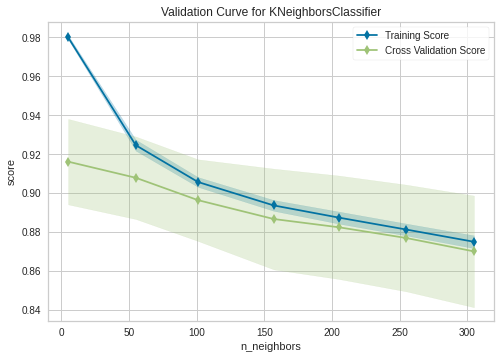

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d742d2d0>,
                cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([  5,  55, 101, 157, 205, 255, 305]),
                scoring='roc_auc')


In [ ]:
knn = KNeighborsClassifier()
print(validation_curve(knn, X, y, param_name="n_neighbors", n_jobs=-1,
      param_range=[5,55,101,157,205,255,305], cv=10, scoring="roc_auc"))

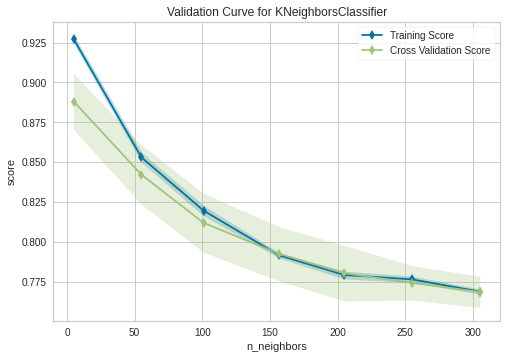

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d730b650>,
                cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([  5,  55, 101, 157, 205, 255, 305]),
                scoring='accuracy')


In [ ]:
knn = KNeighborsClassifier()
print(validation_curve(knn, X, y, param_name="n_neighbors", n_jobs=-1,
      param_range=[5,55,101,157,205,255,305], cv=10, scoring="accuracy"))

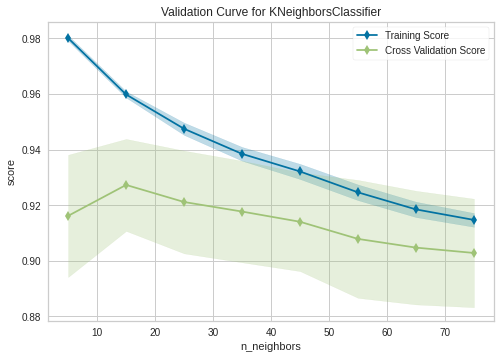

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d9183ad0>,
                cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([ 5, 15, 25, 35, 45, 55, 65, 75]),
                scoring='roc_auc')


In [ ]:
knn = KNeighborsClassifier()
print(validation_curve(knn, X, y, param_name="n_neighbors", n_jobs=-1,
      param_range=[5,15,25,35,45,55,65,75], cv=10, scoring="roc_auc"))

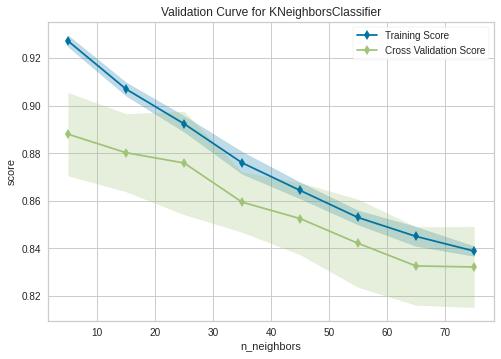

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d6d69f50>,
                cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([ 5, 15, 25, 35, 45, 55, 65, 75]),
                scoring='accuracy')


In [ ]:
knn = KNeighborsClassifier()
print(validation_curve(knn, X, y, param_name="n_neighbors", n_jobs=-1,
      param_range=[5,15,25,35,45,55,65,75], cv=10, scoring="accuracy"))

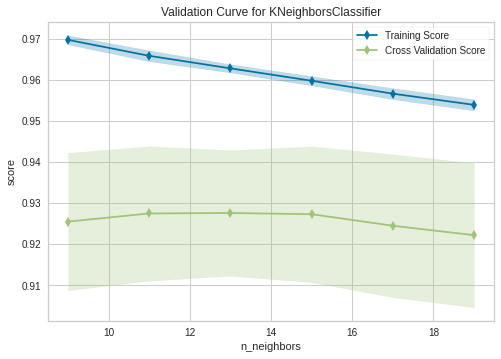

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d6d2a0d0>,
                cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([ 9, 11, 13, 15, 17, 19]), scoring='roc_auc')


In [ ]:
knn = KNeighborsClassifier()
print(validation_curve(knn, X, y, param_name="n_neighbors", n_jobs=-1,
      param_range=[9,11,13,15,17,19], cv=10, scoring="roc_auc"))

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id'],axis=1)
predtest = knn.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.shape

(1500, 20)

In [ ]:
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.head()
testdf.to_csv('pred4.csv', index=False)
files.download('pred4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Create KNN Object.
knn = KNeighborsClassifier()
#Create x and y variables.
x = df3.drop(columns=['Churn','customer_id'])
y = df3['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       340
           1       0.55      0.46      0.50       123

    accuracy                           0.76       463
   macro avg       0.68      0.66      0.67       463
weighted avg       0.74      0.76      0.75       463



0.6599952175992349

In [ ]:
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 23


In [ ]:
#Create KNN Object using best parameters
knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=23, p=1)
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
knn1.fit(x_train, y_train)
#Predict test data set.
y_pred = knn1.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       340
           1       0.89      0.40      0.55       123

    accuracy                           0.83       463
   macro avg       0.85      0.69      0.72       463
weighted avg       0.84      0.83      0.80       463



0.690363462458154

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id'],axis=1)
predtest = knn1.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred5.csv', index=False)
files.download('pred5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Trying Oversampling

In [ ]:
X = df1.drop(['Churn'],axis=1)
y = df1['Churn']

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = KNeighborsClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	# under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('model', model)] #second one in list - ('under', under),
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.685
> k=2, Mean ROC AUC: 0.685
> k=3, Mean ROC AUC: 0.684
> k=4, Mean ROC AUC: 0.692
> k=5, Mean ROC AUC: 0.683
> k=6, Mean ROC AUC: 0.689
> k=7, Mean ROC AUC: 0.683


In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
# ratio = [0.3,0.4,0.5,0.6,0.7]
for k in k_values:
	# define pipeline
	model = KNeighborsClassifier(leaf_size=1, n_neighbors=23, p=1)
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	# under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('model', model)] #second one in list - ('under', under),
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.722
> k=2, Mean ROC AUC: 0.725
> k=3, Mean ROC AUC: 0.723
> k=4, Mean ROC AUC: 0.723
> k=5, Mean ROC AUC: 0.725
> k=6, Mean ROC AUC: 0.726
> k=7, Mean ROC AUC: 0.722


In [ ]:
df2 = df1.copy(deep=True)
X = df2.drop(['Churn','customer_id'],axis=1)
y = df2['Churn']
# fit and apply the transform
print(y.value_counts())
oversample = SMOTE(sampling_strategy=1, k_neighbors=k)
X_over, y_over = oversample.fit_resample(X, y)
print(y_over.value_counts())

0    1737
1     575
Name: Churn, dtype: int64
0    1737
1    1737
Name: Churn, dtype: int64


In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = KNeighborsClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=1, ratio=0.5, Mean ROC AUC: 0.802
> k=1, ratio=0.6, Mean ROC AUC: 0.800
> k=1, ratio=0.7, Mean ROC AUC: 0.804
> k=1, ratio=0.8, Mean ROC AUC: 0.802
> k=1, ratio=0.9, Mean ROC AUC: 0.802
> k=1, ratio=1.0, Mean ROC AUC: 0.805
> k=2, ratio=0.5, Mean ROC AUC: 0.807
> k=2, ratio=0.6, Mean ROC AUC: 0.808
> k=2, ratio=0.7, Mean ROC AUC: 0.813
> k=2, ratio=0.8, Mean ROC AUC: 0.808
> k=2, ratio=0.9, Mean ROC AUC: 0.811
> k=2, ratio=1.0, Mean ROC AUC: 0.814
> k=3, ratio=0.5, Mean ROC AUC: 0.813
> k=3, ratio=0.6, Mean ROC AUC: 0.811
> k=3, ratio=0.7, Mean ROC AUC: 0.814
> k=3, ratio=0.8, Mean ROC AUC: 0.810
> k=3, ratio=0.9, Mean ROC AUC: 0.812
> k=3, ratio=1.0, Mean ROC AUC: 0.811
> k=4, ratio=0.5, Mean ROC AUC: 0.814
> k=4, ratio=0.6, Mean ROC AUC: 0.808
> k=4, ratio=0.7, Mean ROC AUC: 0.811
> k=4, ratio=0.8, Mean ROC AUC: 0.818
> k=4, ratio=0.9, Mean ROC AUC: 0.811
> k=4, ratio=1.0, Mean ROC AUC: 0.812
> k=5, ratio=0.5, Mean ROC AUC: 0.810
> k=5, ratio=0.6, Mean ROC AUC: 0.811
> k=5, ratio

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = KNeighborsClassifier(leaf_size=1, n_neighbors=23, p=1) #
    over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=1, ratio=0.5, Mean ROC AUC: 0.774
> k=1, ratio=0.6, Mean ROC AUC: 0.775
> k=1, ratio=0.7, Mean ROC AUC: 0.772
> k=1, ratio=0.8, Mean ROC AUC: 0.773
> k=1, ratio=0.9, Mean ROC AUC: 0.773
> k=1, ratio=1.0, Mean ROC AUC: 0.776
> k=2, ratio=0.5, Mean ROC AUC: 0.774
> k=2, ratio=0.6, Mean ROC AUC: 0.775
> k=2, ratio=0.7, Mean ROC AUC: 0.776
> k=2, ratio=0.8, Mean ROC AUC: 0.775
> k=2, ratio=0.9, Mean ROC AUC: 0.775
> k=2, ratio=1.0, Mean ROC AUC: 0.774
> k=3, ratio=0.5, Mean ROC AUC: 0.779
> k=3, ratio=0.6, Mean ROC AUC: 0.778
> k=3, ratio=0.7, Mean ROC AUC: 0.778
> k=3, ratio=0.8, Mean ROC AUC: 0.778
> k=3, ratio=0.9, Mean ROC AUC: 0.777
> k=3, ratio=1.0, Mean ROC AUC: 0.775
> k=4, ratio=0.5, Mean ROC AUC: 0.778
> k=4, ratio=0.6, Mean ROC AUC: 0.778
> k=4, ratio=0.7, Mean ROC AUC: 0.778
> k=4, ratio=0.8, Mean ROC AUC: 0.778
> k=4, ratio=0.9, Mean ROC AUC: 0.780
> k=4, ratio=1.0, Mean ROC AUC: 0.777
> k=5, ratio=0.5, Mean ROC AUC: 0.779
> k=5, ratio=0.6, Mean ROC AUC: 0.780
> k=5, ratio

Hyper parameter tuning for oversampling ratio = 0.7 and over sampler k_neighbors=4

In [ ]:
X = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.7, k_neighbors=4)
x_over, y_over = oversample.fit_resample(X, y)
print(y_over.value_counts())
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_over,y_over)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

0    1737
1    1215
Name: Churn, dtype: int64
Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


In [ ]:
X = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.7, k_neighbors=4)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=4)
knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)
#Training the model.
knn2.fit(x_train, y_train)
#Predict test data set.
y_pred = knn2.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)



              precision    recall  f1-score   support

           0       0.94      0.85      0.90       347
           1       0.82      0.93      0.87       244

    accuracy                           0.88       591
   macro avg       0.88      0.89      0.88       591
weighted avg       0.89      0.88      0.88       591



0.8896277223980724

In [ ]:
X = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.7, k_neighbors=2)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=4)
knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)
#Training the model.
knn2.fit(x_train, y_train)
#Predict test data set.
y_pred = knn2.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       347
           1       0.81      0.93      0.87       244

    accuracy                           0.88       591
   macro avg       0.88      0.89      0.88       591
weighted avg       0.89      0.88      0.88       591



0.8908442386734067

In [ ]:
for ratio in [0.5,0.6,0.7,0.8,0.9,1]:
  for kn in [2,3,4,5,6,7]:
    X = df1.drop(columns=['Churn','customer_id'])
    y = df1['Churn']
    oversample = SMOTE(sampling_strategy=ratio, k_neighbors=kn)
    x_over, y_over = oversample.fit_resample(X, y)
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=4)
    knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)
    #Training the model.
    knn2.fit(x_train, y_train)
    #Predict test data set.
    y_pred = knn2.predict(x_test)
    #Checking performance our model with classification report.
    # print(classification_report(y_test, y_pred))
    #Checking performance our model with ROC Score.
    # print(roc_auc_score(y_test, y_pred))
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (kn, ratio, roc_auc_score(y_test, y_pred)))
    # print("############################################")

> k=2, ratio=0.5, Mean ROC AUC: 0.841
> k=3, ratio=0.5, Mean ROC AUC: 0.817
> k=4, ratio=0.5, Mean ROC AUC: 0.836
> k=5, ratio=0.5, Mean ROC AUC: 0.840
> k=6, ratio=0.5, Mean ROC AUC: 0.835
> k=7, ratio=0.5, Mean ROC AUC: 0.821
> k=2, ratio=0.6, Mean ROC AUC: 0.862
> k=3, ratio=0.6, Mean ROC AUC: 0.868
> k=4, ratio=0.6, Mean ROC AUC: 0.870
> k=5, ratio=0.6, Mean ROC AUC: 0.835
> k=6, ratio=0.6, Mean ROC AUC: 0.855
> k=7, ratio=0.6, Mean ROC AUC: 0.850
> k=2, ratio=0.7, Mean ROC AUC: 0.886
> k=3, ratio=0.7, Mean ROC AUC: 0.881
> k=4, ratio=0.7, Mean ROC AUC: 0.869
> k=5, ratio=0.7, Mean ROC AUC: 0.884
> k=6, ratio=0.7, Mean ROC AUC: 0.874
> k=7, ratio=0.7, Mean ROC AUC: 0.883
> k=2, ratio=0.8, Mean ROC AUC: 0.902
> k=3, ratio=0.8, Mean ROC AUC: 0.908
> k=4, ratio=0.8, Mean ROC AUC: 0.914
> k=5, ratio=0.8, Mean ROC AUC: 0.906
> k=6, ratio=0.8, Mean ROC AUC: 0.911
> k=7, ratio=0.8, Mean ROC AUC: 0.898
> k=2, ratio=0.9, Mean ROC AUC: 0.909
> k=3, ratio=0.9, Mean ROC AUC: 0.909
> k=4, ratio

k=4, ratio=0.9, Mean ROC AUC: 0.916 <- BEST obtained above

In [ ]:
X = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.9, k_neighbors=4)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=4)
knn3 = KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)
#Training the model.
knn3.fit(x_train, y_train)
#Predict test data set.
y_pred = knn3.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       355
           1       0.87      0.96      0.92       305

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



0.9214038328330639

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id'],axis=1)
predtest = knn3.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred6.csv', index=False)
files.download('pred6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pred4 - knn with no parameter tuning and no oversampling -> 0.76333(Kaggle score)

pred5 - knn with hyper parameter tuning, and no oversampling -> 0.80555(Kaggle score)

pred6 - knn with hyper parameter tuning and SMOTE oversampling -> 0.75000(Kaggle score) but colab score was 0.9214038328330639 (ROC)

Have to try feature reduction with KNN